# Import required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from folium import Map, Marker, Circle

# Load Dataset

In [2]:
df = pd.read_csv("../input/seoulairqualityhistoricdata/seoul_air_1988_2021.csv")
df

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
0,1988010100,103,37.540037,127.002661,NaN,0.007,10.3,0.000,NaN,NaN
1,1988010100,105,37.593730,126.947561,0.340,0.055,12.6,0.043,NaN,NaN
2,1988010100,107,37.542043,127.047497,0.399,0.046,13.4,NaN,NaN,NaN
3,1988010100,108,37.547185,127.090304,0.261,0.034,5.4,0.000,NaN,NaN
4,1988010100,113,37.654140,127.026801,0.443,0.039,14.6,0.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5984777,2021123123,121,37.487359,126.924913,0.003,0.027,0.5,0.016,21.0,9.0
5984778,2021123123,122,37.504547,126.992308,0.003,0.021,0.4,0.023,16.0,10.0
5984779,2021123123,123,37.517546,127.045775,0.003,0.019,0.4,0.024,18.0,6.0
5984780,2021123123,124,37.502688,127.090327,0.003,0.025,0.5,0.020,21.0,8.0


# Select a single location, `101`, and check the missing period

<AxesSubplot:>

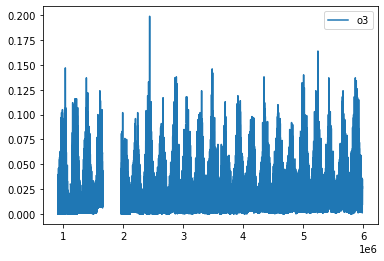

In [3]:
df[df['loc'] == 101][['o3']].plot()

# Select 9AM of Christmas day in 2021

In [4]:
christmas_day = df[df['dt'] == 2021122409]
christmas_day

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
5980228,2021122409,101,37.572021,127.002819,0.004,0.045,0.8,0.003,60.0,38.0
5980229,2021122409,102,37.564302,126.972863,0.005,0.048,0.8,0.002,55.0,35.0
5980230,2021122409,103,37.540037,127.002661,0.004,0.043,0.7,0.002,56.0,32.0
5980231,2021122409,104,37.610084,126.932767,0.004,0.035,1.0,0.003,62.0,38.0
5980232,2021122409,105,37.593730,126.947561,0.005,0.039,0.6,0.003,54.0,37.0
5980233,2021122409,106,37.555595,126.903372,0.004,0.036,0.6,0.002,43.0,27.0
5980234,2021122409,107,37.542043,127.047497,0.004,0.044,0.6,0.006,59.0,38.0
5980235,2021122409,108,37.547185,127.090304,0.003,0.045,0.8,0.002,47.0,33.0
5980236,2021122409,109,37.575703,127.026520,0.004,0.042,0.6,0.004,57.0,33.0
5980237,2021122409,110,37.584872,127.091797,0.004,0.048,0.7,0.002,55.0,29.0


# Show the locations

In [5]:
seoul = [37.5600, 126.9900]
m = Map(location=seoul, tiles='openstreetmap', zoom_start=11)

for idx, row in christmas_day.iterrows():
    Marker([row['lat'], row['long']]).add_to(m)
m

# Show O3 quality relatively

In [6]:
seoul = [37.5600, 126.9900]
m = Map(location=seoul, tiles='openstreetmap', zoom_start=11)

for idx, row in christmas_day.iterrows():
    Circle([row['lat'], row['long']], radius=row['o3']*200000, fill=True, opacity=1, color='red').add_to(m)
m